In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


### Initial Data Exploration and Visualisation

In [39]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [52]:
df = df.drop('loan_id', axis=1)


df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB

Missing values per column:
no_of_dependents            0
education    

There is no need to drop anything other than loan_id at first glance. There are no missing values. Categorical features and target will have to be one hot encoded.

### Standardizing Features, Targets and One-Hot Encoding 

In [58]:
# Cell 1: Split, scale numeric, one-hot encode categorical, recombine
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']

# Numeric vs categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

# Scale numeric
from sklearn.preprocessing import StandardScaler
X_num = StandardScaler().set_output(transform='pandas').fit_transform(X_num)

# One-hot encode categorical
X_cat = pd.get_dummies(X_cat, drop_first=True)

# Recombine
X = pd.concat([X_num, X_cat], axis=1)

# Preview
X.head(3)


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
0,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,False,False
1,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,True,True
2,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,False,False


### Correlation Matrix for all features

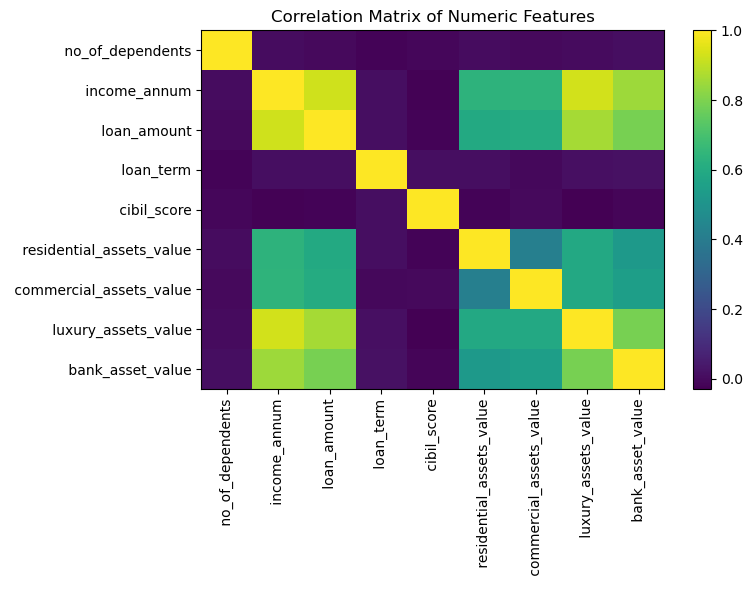

In [66]:
corr = X_num.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

### Scatter Plots of all Features

<Figure size 1200x1200 with 0 Axes>

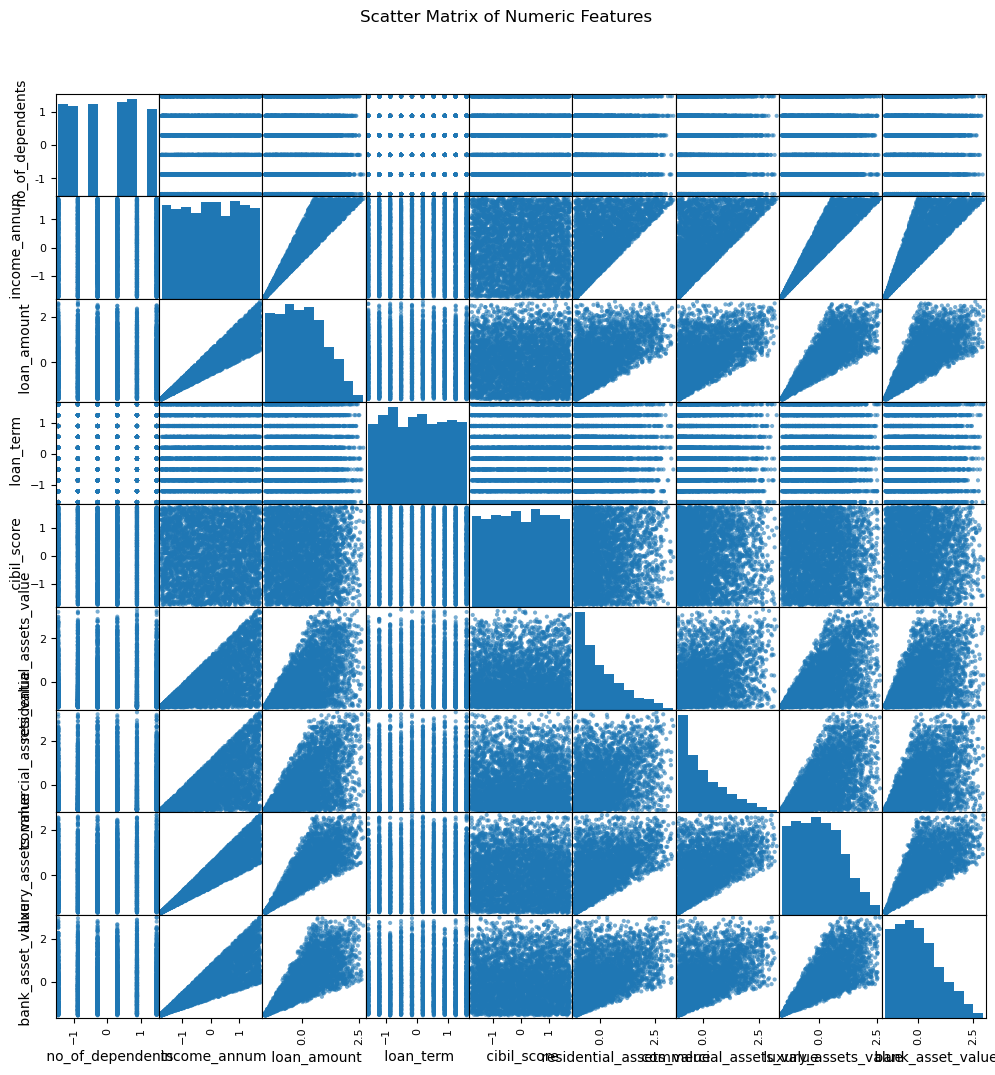

In [76]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
scatter_matrix(X_num, alpha=0.6, diagonal='hist', figsize=(12, 12))
plt.suptitle('Scatter Matrix of Numeric Features', y=0.95)
plt.show()